# Bank Marketing dataset exercise

This file is created as part of requirements in CE888.<br>
**Author** : Tomoko Ayakawa<br>
**Created on**: 28 January 2019<br>
**Last modified**: 2 February 2019

## Load data from a csv file

In [2]:
# import labraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./bank-additional-full.csv', sep=';')

In [3]:
print ("The data has %d attributes" % (len(df.columns) - 1))
df.columns[:-1]

The data has 20 attributes


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

## Create a classifier

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()

Format the data
- Convert categorical attribute to dummy variables
- Remove columns `y_no` and `duration`

In [35]:
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.drop(columns=['y_no', 'duration'])

print ("The data has %d attributes" % (len(df_dummies.columns) - 1))
f_names = df_dummies.columns[:-1]
print ("Feature names:", f_names)

The data has 62 attributes
Feature names: Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'mont

## Plot histogram of `y_yes`

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


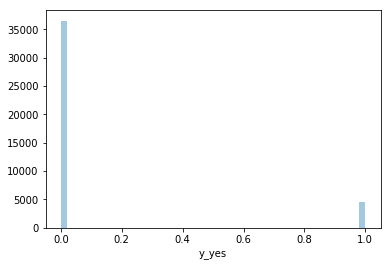

In [6]:
%matplotlib inline
sns.distplot(df_dummies['y_yes'], kde=False)

## Run Classifier

In [7]:
# convert DataFrame to numpy arrays
df_arr = df_dummies.values
features = df_arr[:,:-1]
targets = df_arr[:,-1]

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

# train the classifer with the data before the 500th row
clf.fit(features[:-500], targets[:-500])

# make aprediction with the remaining 500 rows
p = clf.predict(features[-500:])

# show the results
print ("Results:", p)
print ("Accuracy:", accuracy_score (p, targets[-500:]))
print ("Confusion_Matrix:")
print (pd.DataFrame (confusion_matrix
                     (p, targets[-500:], labels = [0, 1]),
                     index = ["  Actual: True", "  Actual: False"],
                     columns = ["Pred: True", "Pred: False"]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Results: [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.

## Cross validation

In [12]:
from sklearn.model_selection import KFold, cross_val_score

score = []
k_fold = KFold(n_splits=10)

for train_i, test_i in k_fold.split(features):
    print('Training (%d): %s | Test (%d): %s' % (len(train_i), train_i, len(test_i), test_i))
    clf.fit(features[train_i], targets[train_i])
    score.append(clf.score(features[test_i], targets[test_i]))

print('\nAverage accuracy: {} %'.format(np.mean(score)*100))

Training (37069): [ 4119  4120  4121 ... 41185 41186 41187] | Test (4119): [   0    1    2 ... 4116 4117 4118]
Training (37069): [    0     1     2 ... 41185 41186 41187] | Test (4119): [4119 4120 4121 ... 8235 8236 8237]
Training (37069): [    0     1     2 ... 41185 41186 41187] | Test (4119): [ 8238  8239  8240 ... 12354 12355 12356]
Training (37069): [    0     1     2 ... 41185 41186 41187] | Test (4119): [12357 12358 12359 ... 16473 16474 16475]
Training (37069): [    0     1     2 ... 41185 41186 41187] | Test (4119): [16476 16477 16478 ... 20592 20593 20594]
Training (37069): [    0     1     2 ... 41185 41186 41187] | Test (4119): [20595 20596 20597 ... 24711 24712 24713]
Training (37069): [    0     1     2 ... 41185 41186 41187] | Test (4119): [24714 24715 24716 ... 28830 28831 28832]
Training (37069): [    0     1     2 ... 41185 41186 41187] | Test (4119): [28833 28834 28835 ... 32949 32950 32951]
Training (37070): [    0     1     2 ... 41185 41186 41187] | Test (4118): [

## Feature importances
[feature_importances_](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) evaluates the importance of features in a classification task.

### Obtain feature importance

In [38]:
# evaluate the feature importance
imp = clf.feature_importances_

# standard deviation of feature importance of each tree
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# index to sort importance array
indices = np.argsort(imp)[::-1]

# print variables
print ("Importance of %d features: %s" % (len(imp), imp))
print ("Number of trees in the classifier: %d\n" % len(clf.estimators_))

# Print the feature ranking
print("Feature ranking:")
for f in range(len(imp)):
    print(" %2d. %s (%f)" % (f + 1, f_names[indices[f]],  imp[indices[f]]))

Importance of 62 features: [2.23090196e-01 1.45297918e-01 7.50299665e-03 4.38150062e-03
 1.33172251e-02 9.04982811e-03 9.65524218e-03 9.43161159e-02
 9.66874691e-03 1.95443054e-02 1.46707113e-02 7.75887961e-03
 5.19775102e-03 1.07019853e-02 7.86932227e-03 7.43070045e-03
 1.11260288e-02 4.91455953e-03 1.67012472e-02 6.31652487e-03
 2.52884532e-03 1.20912595e-02 1.94344301e-02 1.56792992e-02
 9.31939050e-04 8.73222948e-03 8.34916564e-03 1.27721214e-02
 1.59935201e-02 2.37966188e-04 1.16032278e-02 1.51725142e-02
 7.44455513e-03 9.39120371e-03 9.17843111e-03 4.00689011e-06
 2.29113974e-02 2.76529644e-03 2.43532042e-02 1.67693170e-02
 3.02249024e-03 1.74733166e-02 6.38542257e-03 4.52746061e-03
 2.58671512e-03 4.07731809e-04 2.56891764e-05 1.46094842e-03
 7.60395636e-03 7.99468161e-03 6.85633265e-03 1.63530037e-03
 6.20091083e-03 0.00000000e+00 1.42697125e-02 1.46165970e-02
 1.47671289e-02 1.53574614e-02 1.61809005e-02 3.70249294e-03
 3.56320675e-03 6.50582823e-03]
Number of trees in the cla

### Plot feature importance

(-1, 10)

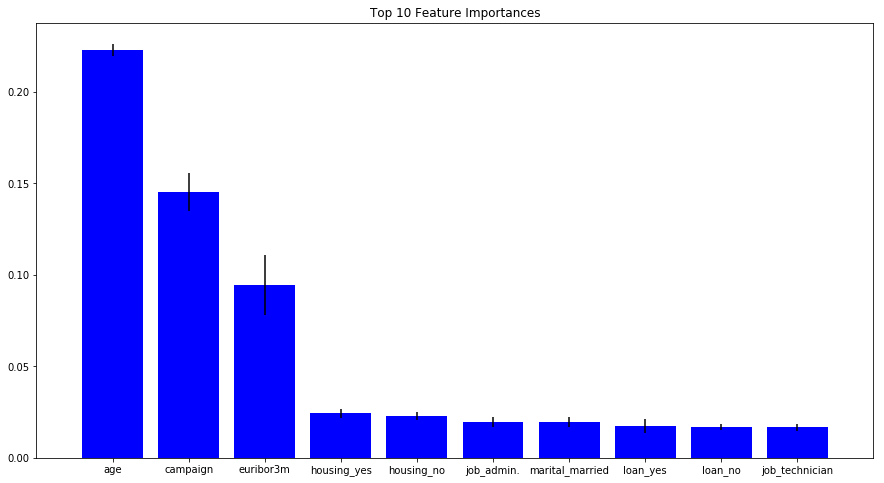

In [58]:
num = 10 # number of top features to plot

fig = plt.figure()
fig.set_size_inches(15,8)
plt.title("Top %d Feature Importances" % num)
plt.bar(range(num), imp[indices[:num]], color='b', yerr=std[indices[:num]], align="center")
plt.xticks(range(num), np.array(feature_names)[indices[:num]])
plt.xlim([-1, num])

## Confusion Matrix
Plot the prediction result with 500 data (prediction is made in Run Classifier section).

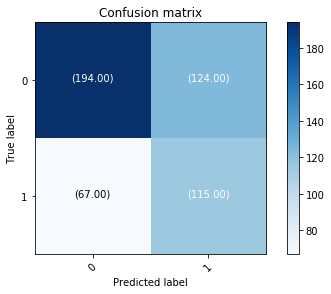

In [70]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # display confusion matrix values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        plt.text(j, i, t,horizontalalignment="center",\
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(p, targets[-500:])
#np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize = False,\
                      classes=range(len(set(targets))), title='Confusion matrix')